In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
data_loc = "D:/Timing/YAG Firing/Scope Data/"
fname_ch1 = "Newfile2.csv"
fname_ch2 = "Newfile2_CH2.csv"

In [3]:
def read_csv(data_loc, fname):
    with open(data_loc+fname, 'r') as f:
        data = f.readlines()[2:-1]
        x,y = np.empty(len(data)), np.empty(len(data))
        for idd, d in enumerate(tqdm(data)):
            x[idd] = int(d.split(',')[0])
            y[idd] = float(d.split(',')[1])
        del data
    return x,y

In [4]:
x_CH1, y_CH1 = read_csv(data_loc, fname_ch1)
x_CH2, y_CH2 = read_csv(data_loc, fname_ch2)

100%|██████████████████████████████████████████████████████████████████| 55999999/55999999 [01:35<00:00, 587170.11it/s]


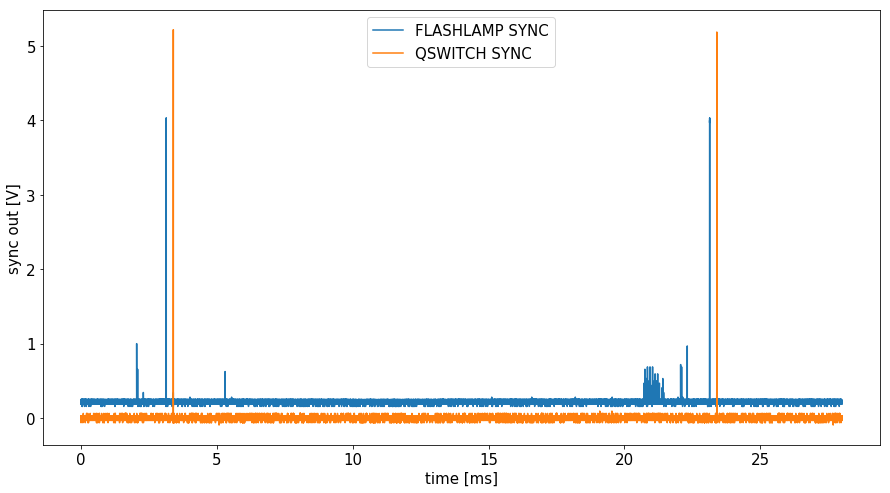

In [23]:
fig, ax = plt.subplots(figsize = (15,8))

ax.plot(x_CH1[::500]*1/2e9*1e3, y_CH1[::500], label = 'FLASHLAMP SYNC')
ax.plot(x_CH2[::500]*1/2e9*1e3, y_CH2[::500], label = 'QSWITCH SYNC')

ax.set_xlabel('time [ms]', fontsize = 15)
ax.set_ylabel('sync out [V]', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=13)
ax.legend(fontsize = 15);
fig.savefig('YAG_trigger_noise.png')

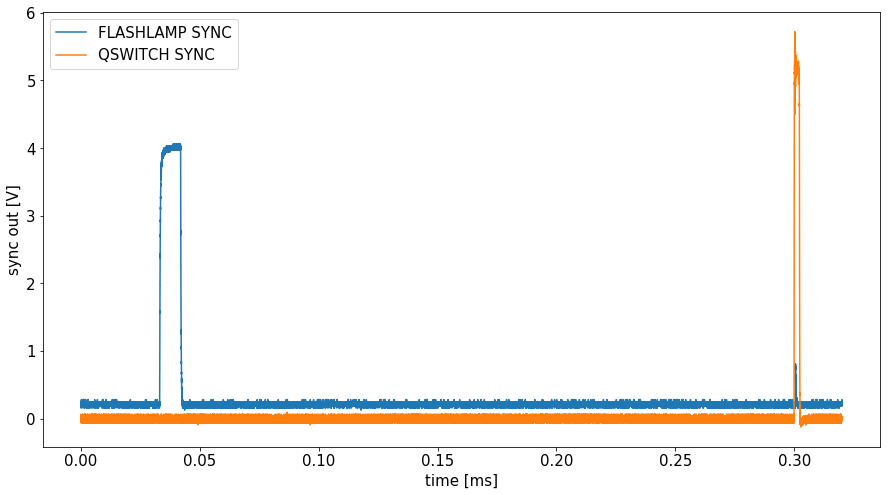

In [53]:
mask = (x_CH1*1/2e9 >= 3.1e-3) * (x_CH1*1/2e9 <= 3.42e-3)
fig, ax = plt.subplots(figsize = (15,8))

ax.plot((x_CH1[mask]-x_CH1[mask][0])*1/2e9*1e3, y_CH1[mask], label = 'FLASHLAMP SYNC')
ax.plot((x_CH2[mask]-x_CH2[mask][0])*1/2e9*1e3, y_CH2[mask], label = 'QSWITCH SYNC')

ax.set_xlabel('time [ms]', fontsize = 15)
ax.set_ylabel('sync out [V]', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=13)
ax.legend(fontsize = 15);
fig.savefig('YAG_trigger_zoom.png')

FWHM = 8.804 us


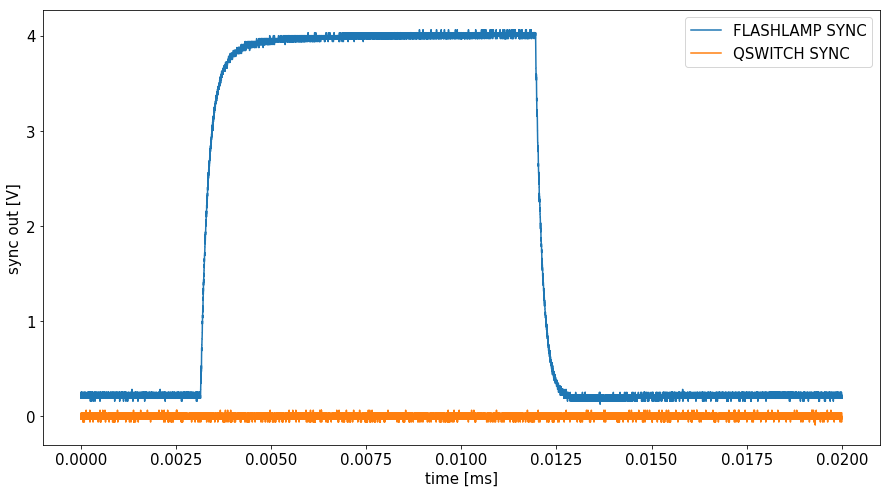

In [52]:
mask = (x_CH1*1/2e9 >= 3.13e-3) * (x_CH1*1/2e9 <= 3.15e-3)
fig, ax = plt.subplots(figsize = (15,8))

ax.plot((x_CH1[mask]-x_CH1[mask][0])*1/2e9*1e3, y_CH1[mask], label = 'FLASHLAMP SYNC')
ax.plot((x_CH2[mask]-x_CH1[mask][0])*1/2e9*1e3, y_CH2[mask], label = 'QSWITCH SYNC')

ax.set_xlabel('time [ms]', fontsize = 15)
ax.set_ylabel('sync out [V]', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=13)
ax.legend(fontsize = 15);
fig.savefig('YAG_trigger_flashlamp.png')

print("FWHM = {0:.3f} us".format((np.where(y_CH1[mask] == 2)[0]).ptp()*1/2e9*1e6))

FWHM = 2.283 us


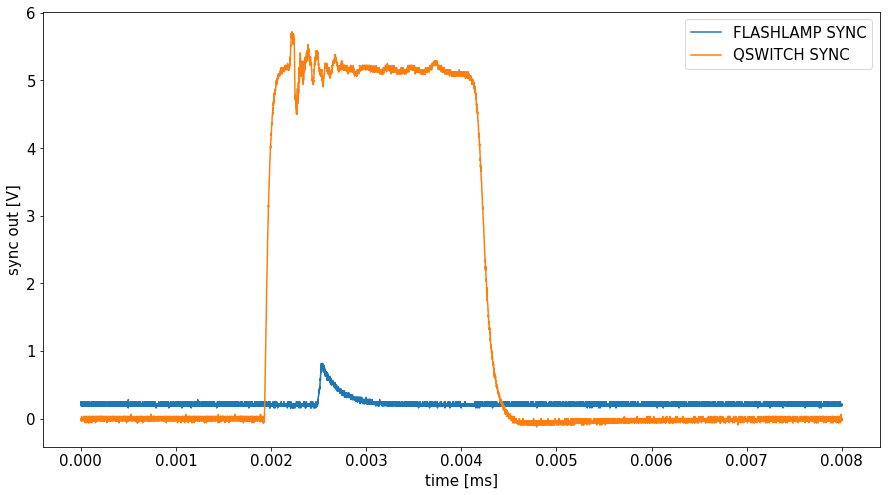

In [54]:
mask = (x_CH1*1/2e9 >= 3.398e-3) * (x_CH1*1/2e9 <= 3.406e-3)
fig, ax = plt.subplots(figsize = (15,8))

ax.plot((x_CH1[mask]-x_CH1[mask][0])*1/2e9*1e3, y_CH1[mask], label = 'FLASHLAMP SYNC')
ax.plot((x_CH2[mask]-x_CH2[mask][0])*1/2e9*1e3, y_CH2[mask], label = 'QSWITCH SYNC')

ax.set_xlabel('time [ms]', fontsize = 15)
ax.set_ylabel('sync out [V]', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=13)
ax.legend(fontsize = 15);
fig.savefig('YAG_trigger_qswitch.png')

print("FWHM = {0:.3f} us".format((np.where(y_CH2[mask] == 2.5)[0]).ptp()*1/2e9*1e6))

In [55]:
y_CH1[mask][0]

0.21875